<a href="https://colab.research.google.com/github/azhgh22/Walmart-Recruiting-Store-Sales-Forecasting/blob/main/notebooks/01_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import userdata
token = userdata.get('GITHUB_TOKEN')
user_name = userdata.get('GITHUB_USERNAME')
mail = userdata.get('GITHUB_MAIL')

!git config --global user.name "{user_name}"
!git config --global user.email "{mail}"
!git clone https://{token}@github.com/azhgh22/Walmart-Recruiting-Store-Sales-Forecasting.git

%cd Walmart-Recruiting-Store-Sales-Forecasting

Cloning into 'Walmart-Recruiting-Store-Sales-Forecasting'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 104 (delta 42), reused 78 (delta 30), pack-reused 0 (from 0)
Receiving objects: 100% (104/104), 3.81 MiB | 12.81 MiB/s, done.
Resolving deltas: 100% (42/42), done.
/content/Walmart-Recruiting-Store-Sales-Forecasting


In [3]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 86.1 MB/s eta 0:00:00


In [4]:
from google.colab import userdata
kaggle_json_path = userdata.get('KAGGLE_JSON_PATH')
! ./src/data_loader.sh -f {kaggle_json_path}

Setting up Kaggle credentials...
Ensuring data directory exists at 'data/'...
  0% 0.00/2.70M [00:00<?, ?B/s]
100% 2.70M/2.70M [00:00<00:00, 127MB/s]
Unzipping files...
Archive:  walmart-recruiting-store-sales-forecasting.zip
  inflating: features.csv.zip        
  inflating: sampleSubmission.csv.zip  
  inflating: stores.csv              
  inflating: test.csv.zip            
  inflating: train.csv.zip           
Archive:  features.csv.zip
  inflating: features.csv            
Archive:  sampleSubmission.csv.zip
  inflating: sampleSubmission.csv    
Archive:  test.csv.zip
  inflating: test.csv                
Archive:  train.csv.zip
  inflating: train.csv               
Data downloaded and extracted successfully to 'data/'.


# Load Data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from src import data_loader
dataframes = data_loader.load_raw_data()

Data loading complete.


In [7]:
from src import processing
df = processing.run_preprocessing(dataframes, process_test=False)['train']
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


In [8]:
from src import config
train_data, _ = processing.split_data(df, separate_target=False)
train_data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279080,45,93,2011-11-25,3898.68,True,48.71,3.492,140.87,384.82,26961.99,28.59,1110.12,188.350400,8.523,B,118221
279081,45,94,2011-11-25,4288.49,True,48.71,3.492,140.87,384.82,26961.99,28.59,1110.12,188.350400,8.523,B,118221
279082,45,95,2011-11-25,48012.46,True,48.71,3.492,140.87,384.82,26961.99,28.59,1110.12,188.350400,8.523,B,118221
279083,45,97,2011-11-25,5200.55,True,48.71,3.492,140.87,384.82,26961.99,28.59,1110.12,188.350400,8.523,B,118221


# Trend Analysis

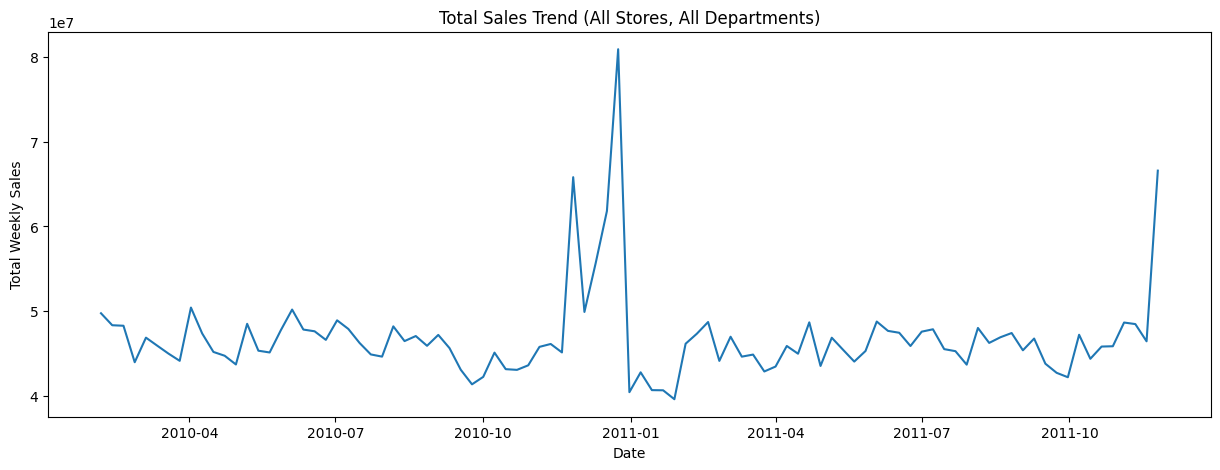

In [9]:
total_sales = train_data.groupby('Date')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(15,5))
sns.lineplot(data=total_sales, x='Date', y='Weekly_Sales')
plt.title('Total Sales Trend (All Stores, All Departments)')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.show()

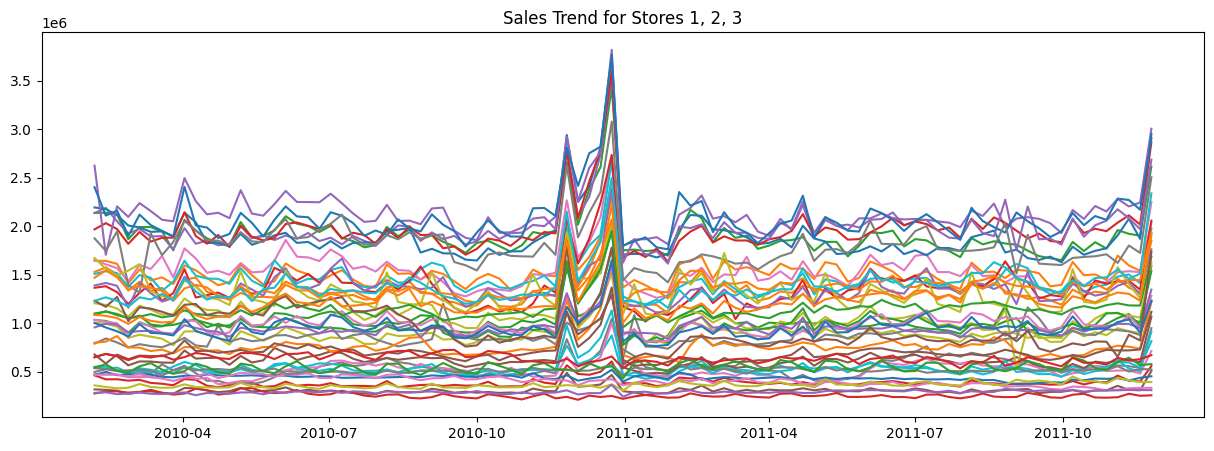

In [10]:
store_sales = train_data.groupby(['Store', 'Date'])['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(15,5))
for store in range(45):
    store_df = store_sales[store_sales['Store'] == store]
    plt.plot(store_df['Date'], store_df['Weekly_Sales'])
plt.title('Sales Trend for Stores 1, 2, 3')
plt.show()

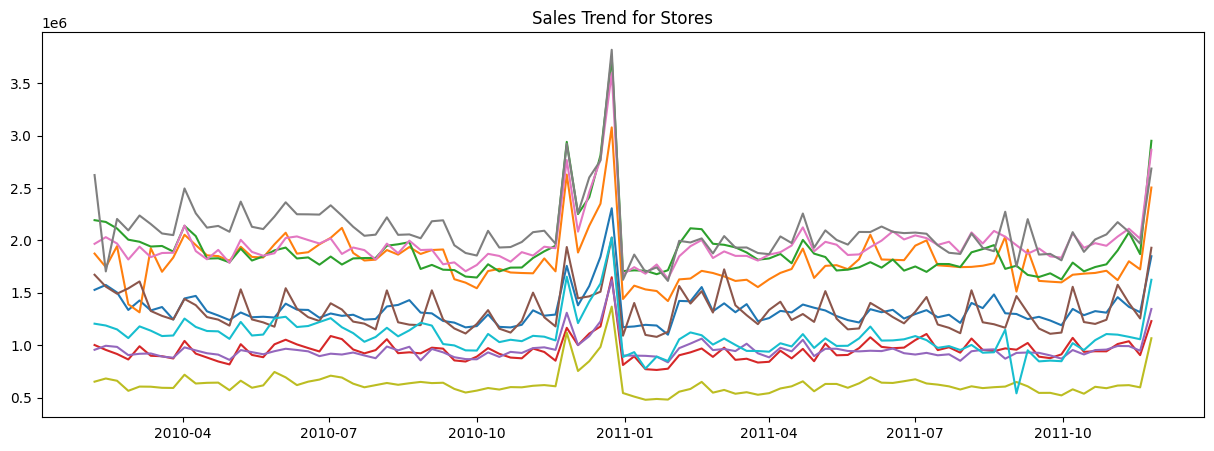

In [11]:
import random
store_sales = train_data.groupby(['Store', 'Date'])['Weekly_Sales'].sum().reset_index()
unique_stores = store_sales['Store'].unique()
random_stores = random.sample(list(unique_stores), 10)

store_sales = train_data.groupby(['Store', 'Date'])['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(15,5))
for store in random_stores:
    store_df = store_sales[store_sales['Store'] == store]
    plt.plot(store_df['Date'], store_df['Weekly_Sales'])
plt.title('Sales Trend for Stores')
plt.show()

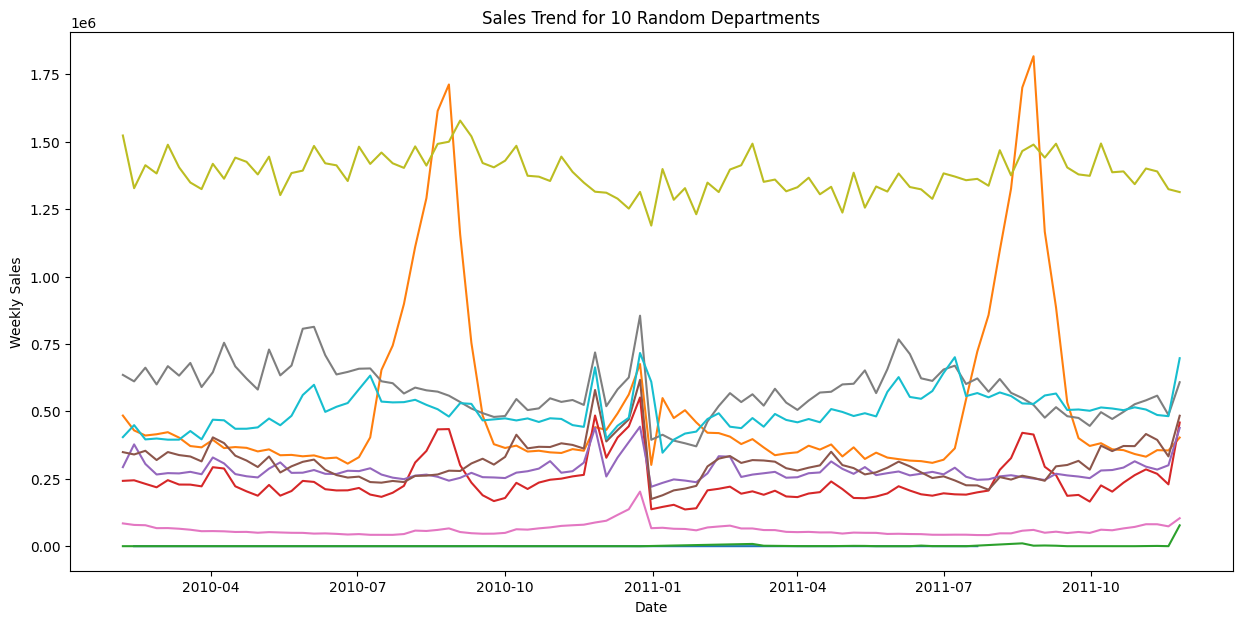

In [12]:
dept_sales = train_data.groupby(['Dept', 'Date'])['Weekly_Sales'].sum().reset_index()
unique_depts = dept_sales['Dept'].unique()
random_depts = random.sample(list(unique_depts), 10)

plt.figure(figsize=(15,7))

for dept in random_depts:
    dept_df = dept_sales[dept_sales['Dept'] == dept]
    plt.plot(dept_df['Date'], dept_df['Weekly_Sales'])

plt.title('Sales Trend for 10 Random Departments')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

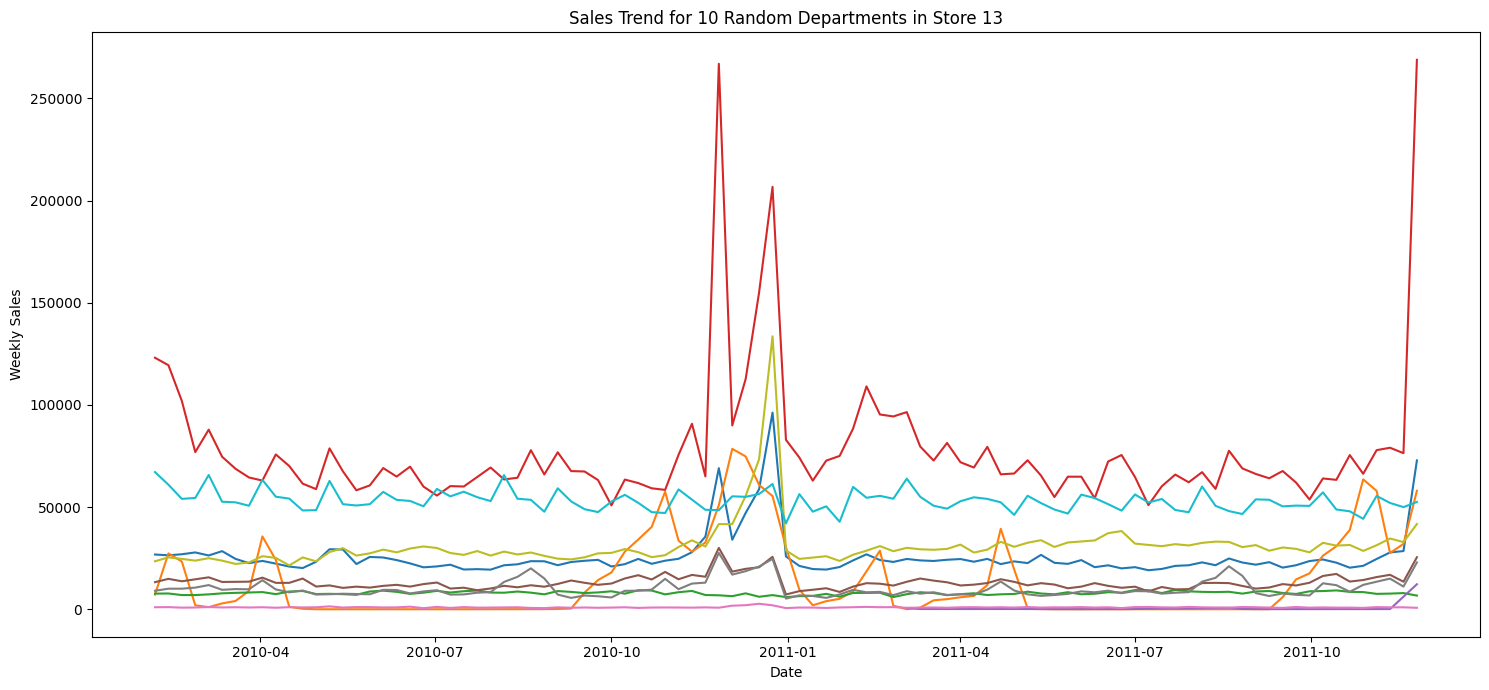

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import random

unique_stores = train_data['Store'].unique()
random_store = random.choice(unique_stores)
store_data = train_data[train_data['Store'] == random_store]
unique_depts = store_data['Dept'].unique()

num_depts = min(10, len(unique_depts))
random_depts = random.sample(list(unique_depts), num_depts)
plt.figure(figsize=(15,7))

for dept in random_depts:
    dept_df = store_data[store_data['Dept'] == dept]
    plt.plot(dept_df['Date'], dept_df['Weekly_Sales'])

plt.title(f'Sales Trend for 10 Random Departments in Store {random_store}')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.tight_layout()
plt.show()

/tmp/ipython-input-14-2723754281.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dept_store = train_data[(train_data['Store'] == fixed_store) & (df['Dept'] == fixed_dept)].set_index('Date')['Weekly_Sales']


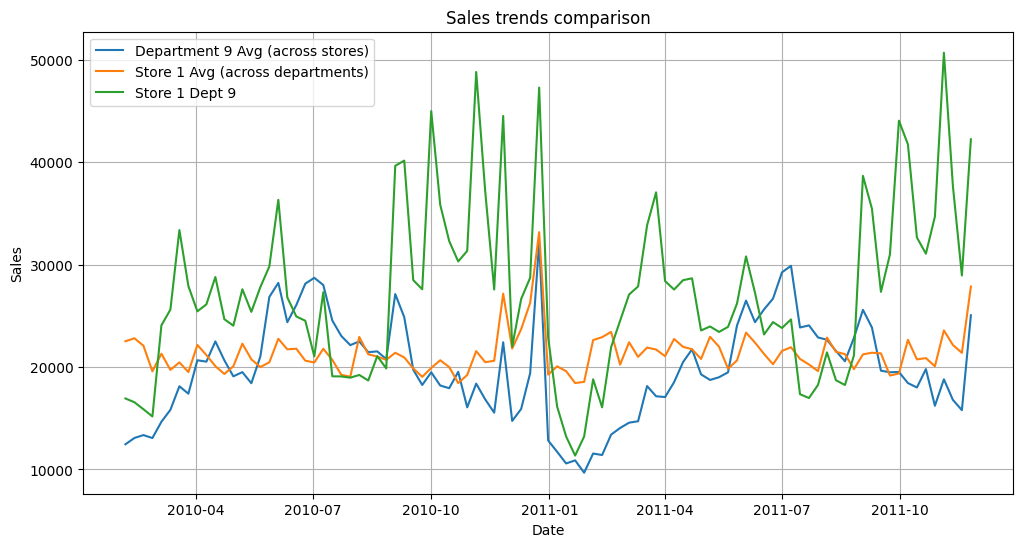

In [14]:
fixed_dept = 9
fixed_store = 1

dept_avg = train_data[train_data['Dept'] == fixed_dept].groupby('Date')['Weekly_Sales'].mean()

store_avg = train_data[train_data['Store'] == fixed_store].groupby('Date')['Weekly_Sales'].mean()
dept_store = train_data[(train_data['Store'] == fixed_store) & (df['Dept'] == fixed_dept)].set_index('Date')['Weekly_Sales']

plt.figure(figsize=(12,6))
plt.plot(dept_avg.index, dept_avg.values, label=f'Department {fixed_dept} Avg (across stores)')
plt.plot(store_avg.index, store_avg.values, label=f'Store {fixed_store} Avg (across departments)')
plt.plot(dept_store.index, dept_store.values, label=f'Store {fixed_store} Dept {fixed_dept}')

plt.title('Sales trends comparison')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
del store_data
del unique_stores
del unique_depts
del random_store
del random_depts
del num_depts
del dept_sales
del store_sales
del total_sales
del dept_avg
del store_avg
del dept_store

# Seasonality


/tmp/ipython-input-16-4090387886.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.loc[:, 'Month'] = train_data['Date'].dt.month


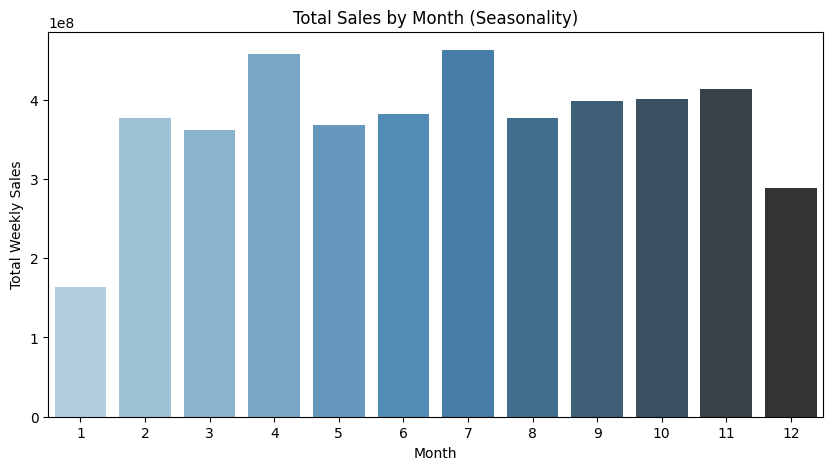

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_data.loc[:, 'Month'] = train_data['Date'].dt.month
monthly_sales = train_data.groupby('Month')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='Month', y='Weekly_Sales', hue='Month', data=monthly_sales, palette='Blues_d', legend=False)
plt.title('Total Sales by Month (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Total Weekly Sales')
plt.show()

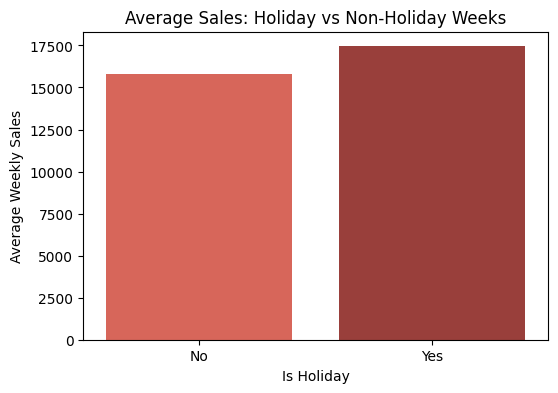

In [17]:
holiday_sales = train_data.groupby('IsHoliday')['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=holiday_sales, palette='Reds_d', hue='IsHoliday', legend=False)
plt.title('Average Sales: Holiday vs Non-Holiday Weeks')
plt.xlabel('Is Holiday')
plt.ylabel('Average Weekly Sales')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

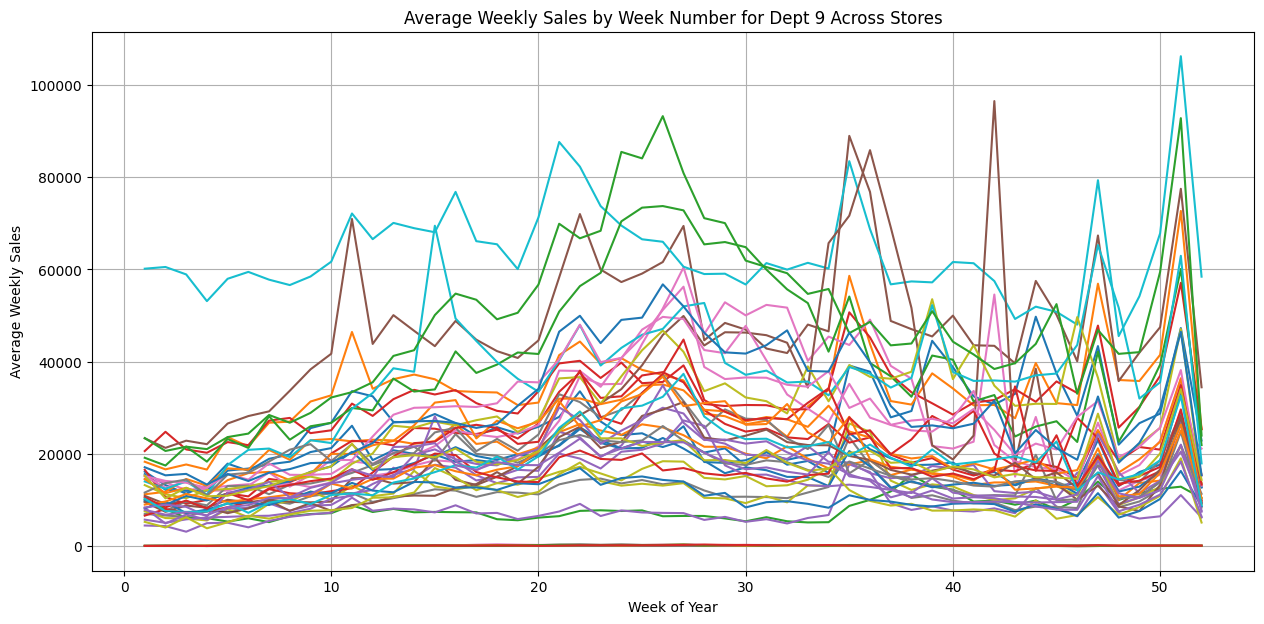

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

train_data = train_data.copy()
train_data['WeekOfYear'] = train_data['Date'].dt.isocalendar().week
train_data['Year'] = train_data['Date'].dt.year

dept_id = 9
dept_data = train_data[train_data['Dept'] == dept_id]
weekly_store_sales = dept_data.groupby(['Store', 'WeekOfYear'])['Weekly_Sales'].mean().reset_index()
plt.figure(figsize=(15,7))

stores = weekly_store_sales['Store'].unique()

for store in stores:
    store_df = weekly_store_sales[weekly_store_sales['Store'] == store]
    plt.plot(store_df['WeekOfYear'], store_df['Weekly_Sales'])

plt.title(f'Average Weekly Sales by Week Number for Dept {dept_id} Across Stores')
plt.xlabel('Week of Year')
plt.ylabel('Average Weekly Sales')
plt.grid(True)
plt.show()


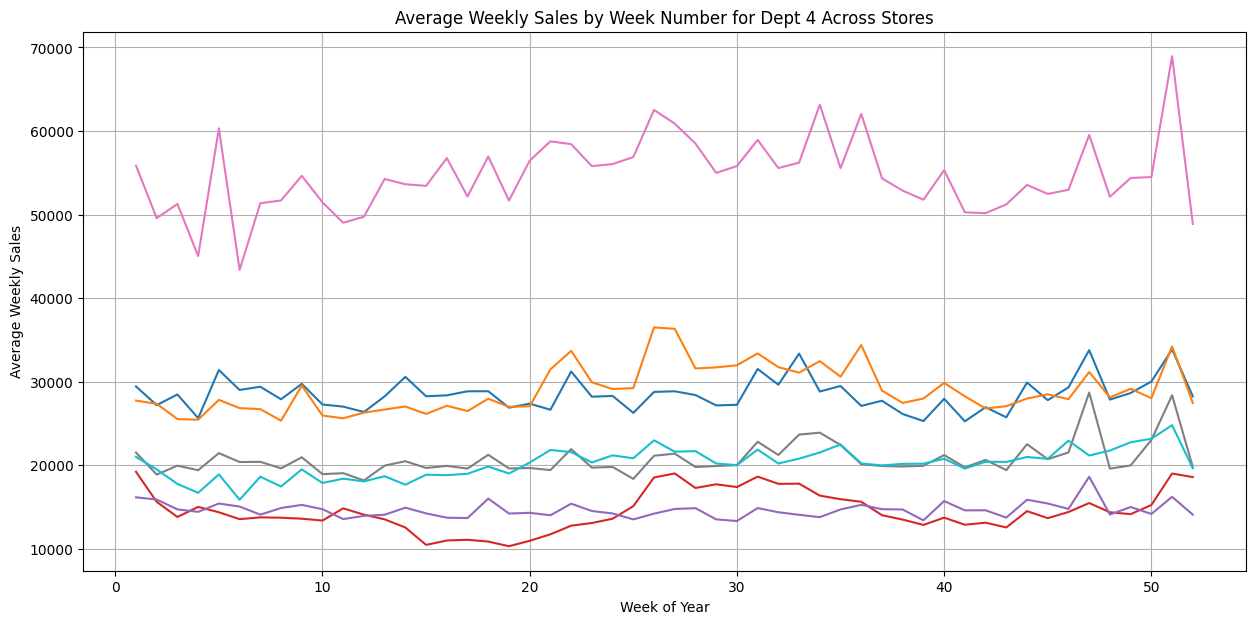

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

dept_sales = train_data.groupby(['Dept', 'Date'])['Weekly_Sales'].sum().reset_index()
unique_depts = dept_sales['Dept'].unique()

train_data = train_data.copy()
train_data['WeekOfYear'] = train_data['Date'].dt.isocalendar().week
train_data['Year'] = train_data['Date'].dt.year

dept_id = 4
dept_data = train_data[train_data['Dept'] == dept_id]

weekly_store_sales = dept_data.groupby(['Store', 'WeekOfYear'])['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(15,7))

stores = weekly_store_sales['Store'].unique()
random_stores = random.sample(list(unique_depts), 10)

for store in random_stores:
    store_df = weekly_store_sales[weekly_store_sales['Store'] == store]
    plt.plot(store_df['WeekOfYear'], store_df['Weekly_Sales'])

plt.title(f'Average Weekly Sales by Week Number for Dept {dept_id} Across Stores')
plt.xlabel('Week of Year')
plt.ylabel('Average Weekly Sales')
plt.grid(True)
plt.show()

# Analyze Corelation

<Figure size 1200x400 with 0 Axes>

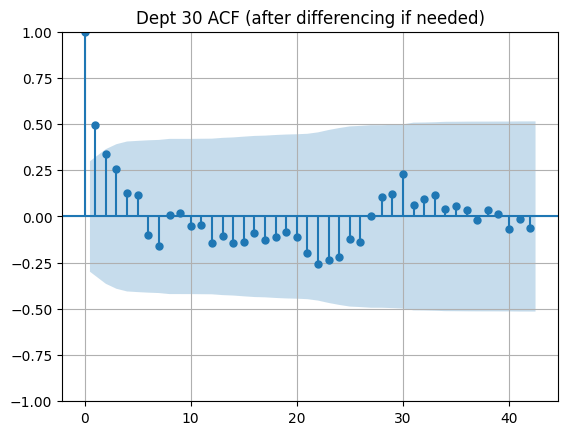

<Figure size 1200x400 with 0 Axes>

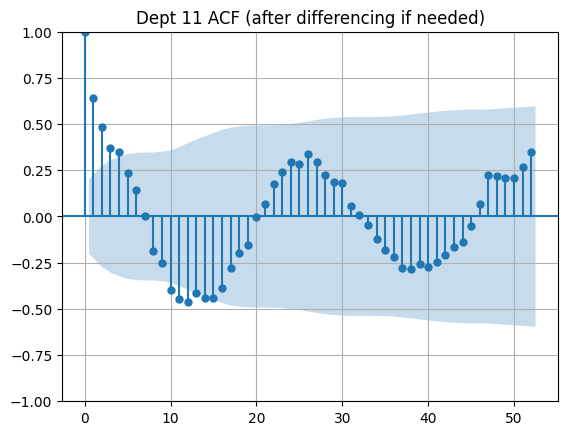

<Figure size 1200x400 with 0 Axes>

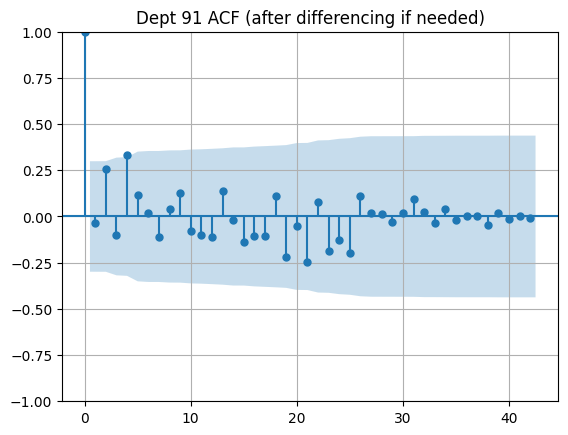

<Figure size 1200x400 with 0 Axes>

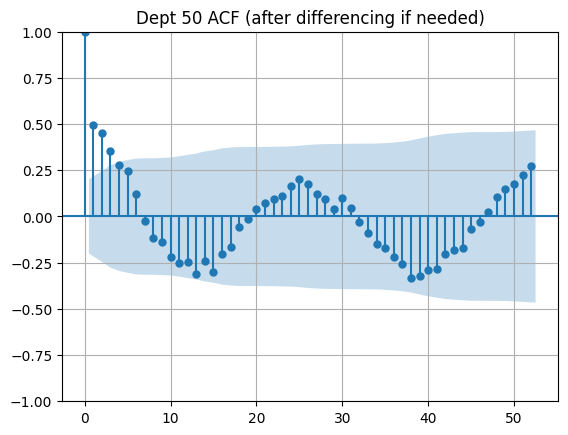

<Figure size 1200x400 with 0 Axes>

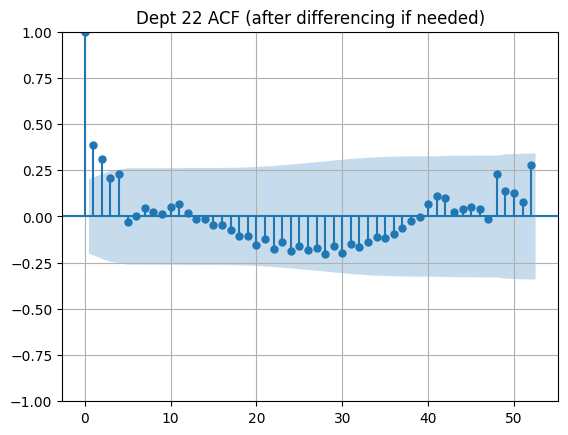

In [20]:
import random
from src import analysis_helpers

random_depts = random.sample(list(train_data['Dept'].unique()), 5)
for dept in random_depts:
    plot_title = f'Dept {dept} ACF (after differencing if needed)'
    series = analysis_helpers.aggregate_dept_sales(train_data, dept)
    analysis_helpers.analyze_acf(series, seasonal_lag=52, plot_title=plot_title)


<Figure size 1200x400 with 0 Axes>

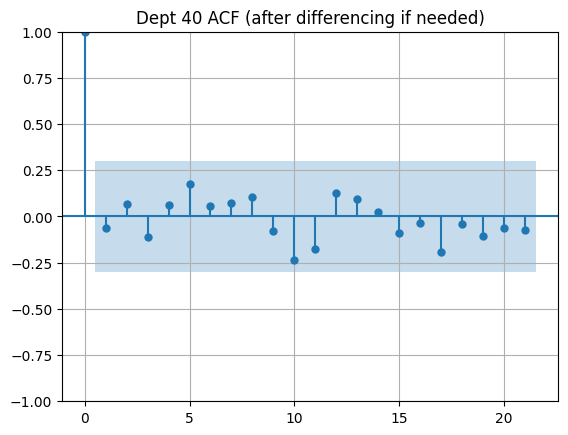

<Figure size 1200x400 with 0 Axes>

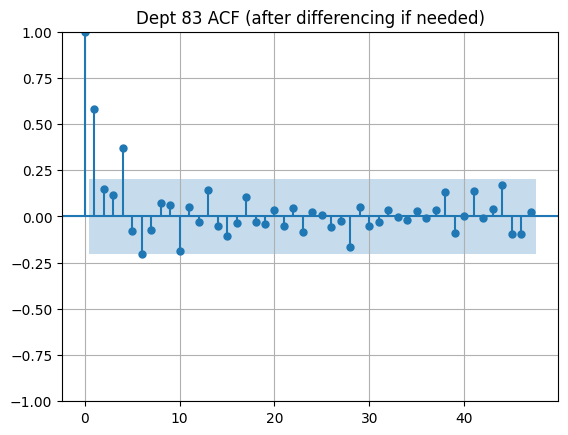

<Figure size 1200x400 with 0 Axes>

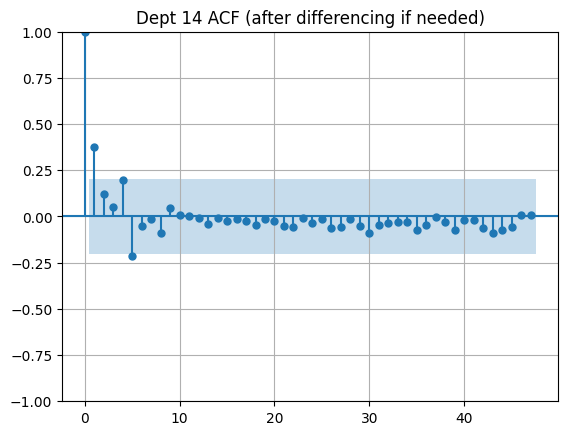

<Figure size 1200x400 with 0 Axes>

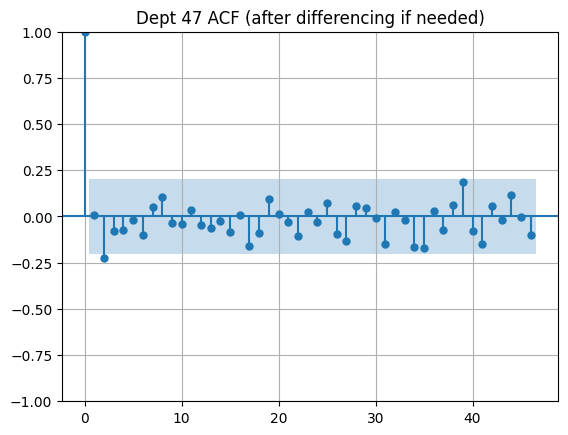

<Figure size 1200x400 with 0 Axes>

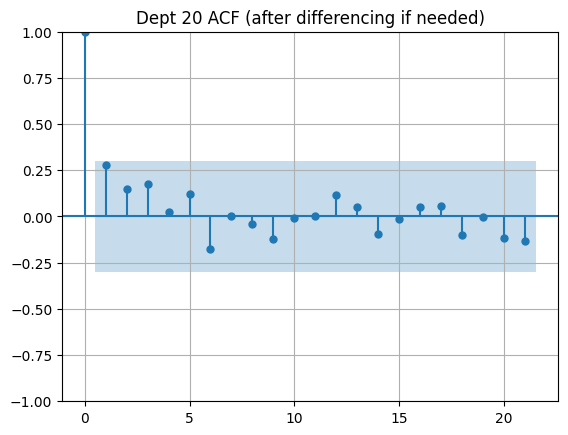

In [21]:
import random
from src import analysis_helpers

random_depts = random.sample(list(train_data['Dept'].unique()), 5)
for dept in random_depts:
    plot_title = f'Dept {dept} ACF (after differencing if needed)'
    series = analysis_helpers.aggregate_dept_sales(train_data, dept)
    analysis_helpers.analyze_pacf(series, seasonal_lag=52, plot_title=plot_title)


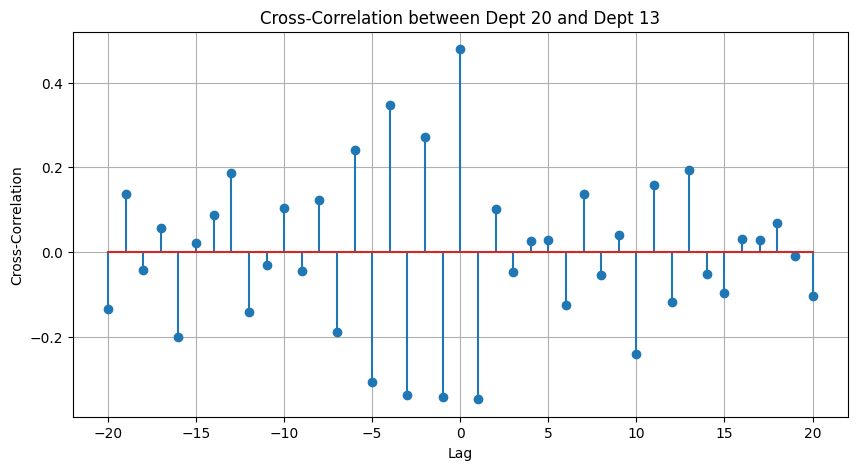

In [22]:
from src.utils import *
from src import analysis_helpers

dept_id_1 = 20
dept_id_2 = 13

sales1 = analysis_helpers.aggregate_dept_sales(train_data, dept_id_1)
sales2 = analysis_helpers.aggregate_dept_sales(train_data, dept_id_2)

common_dates = sales1.index.intersection(sales2.index)
sales1 = sales1.loc[common_dates]
sales2 = sales2.loc[common_dates]

sales1_diff = difference_series(sales1, lag=1)
sales2_diff = difference_series(sales2, lag=1)

lags, ccf_vals = analysis_helpers.cross_correlation(sales1_diff.values, sales2_diff.values, max_lag=20)

plt.figure(figsize=(10,5))
plt.stem(lags, ccf_vals)
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.title(f'Cross-Correlation between Dept {dept_id_1} and Dept {dept_id_2}')
plt.grid(True)
plt.show()

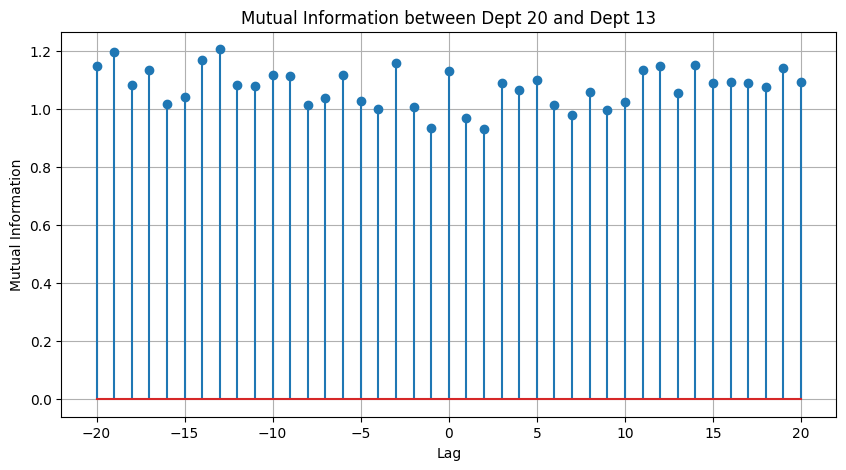

In [23]:
from src.utils import *
from src import analysis_helpers

dept_id_1 = 20
dept_id_2 = 13

sales1 = analysis_helpers.aggregate_dept_sales(train_data, dept_id_1)
sales2 = analysis_helpers.aggregate_dept_sales(train_data, dept_id_2)

common_dates = sales1.index.intersection(sales2.index)
sales1 = sales1.loc[common_dates]
sales2 = sales2.loc[common_dates]

lags, mi_vals = analysis_helpers.mutual_information(sales1.values, sales2.values, max_lag=20, bins=20)

plt.figure(figsize=(10,5))
plt.stem(lags, mi_vals)
plt.xlabel('Lag')
plt.ylabel('Mutual Information')
plt.title(f'Mutual Information between Dept {dept_id_1} and Dept {dept_id_2}')
plt.grid(True)
plt.show()


# Past Features

Random Department (Summed over all stores): 11


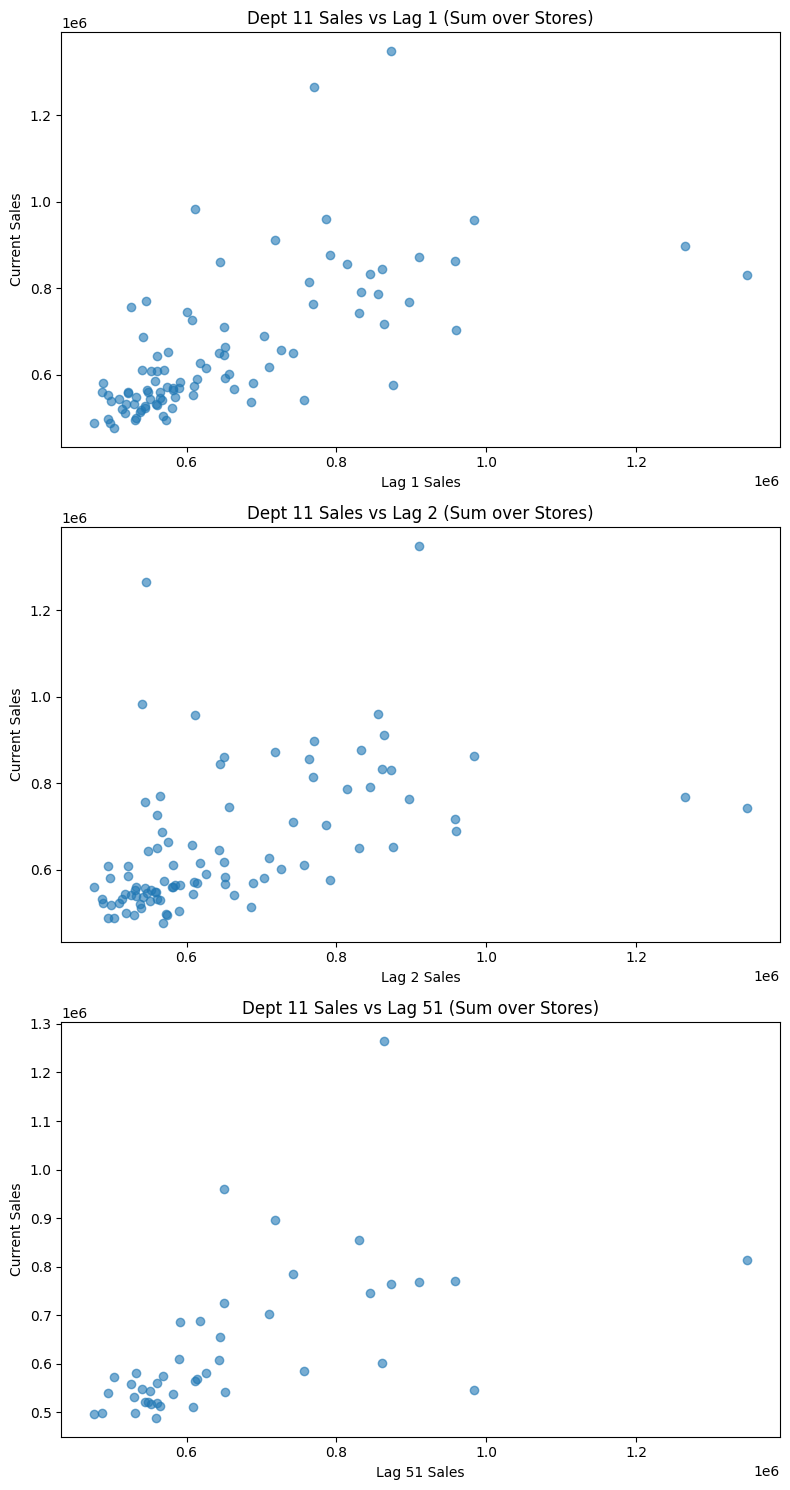

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import random

lag_k = 51

random_dept = random.choice(train_data['Dept'].unique())
print(f"Random Department (Summed over all stores): {random_dept}")

dept_sales = train_data[train_data['Dept'] == random_dept].groupby('Date')['Weekly_Sales'].sum().sort_index()

lag1 = dept_sales.shift(1)
lag2 = dept_sales.shift(2)
lagk = dept_sales.shift(lag_k)

fig, axs = plt.subplots(3, 1, figsize=(8, 15))

axs[0].scatter(lag1, dept_sales, alpha=0.6)
axs[0].set_title(f'Dept {random_dept} Sales vs Lag 1 (Sum over Stores)')
axs[0].set_xlabel('Lag 1 Sales')
axs[0].set_ylabel('Current Sales')

axs[1].scatter(lag2, dept_sales, alpha=0.6)
axs[1].set_title(f'Dept {random_dept} Sales vs Lag 2 (Sum over Stores)')
axs[1].set_xlabel('Lag 2 Sales')
axs[1].set_ylabel('Current Sales')

axs[2].scatter(lagk, dept_sales, alpha=0.6)
axs[2].set_title(f'Dept {random_dept} Sales vs Lag {lag_k} (Sum over Stores)')
axs[2].set_xlabel(f'Lag {lag_k} Sales')
axs[2].set_ylabel('Current Sales')

plt.tight_layout()
plt.show()
